## BREAST CANCER CLASSIFICATION USING MACHINE LEARNING

### Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import os
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

## Data Collection and Preprocessing

In [2]:
breast_cancer =pd.read_csv(r"C:\Users\hp\Documents\data.csv")

In [3]:
breast_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [4]:
breast_cancer.shape

(569, 33)

In [5]:
breast_cancer.describe()

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [6]:
breast_cancer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
breast_cancer.value_counts

<bound method DataFrame.value_counts of            id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92   

In [8]:
breast_cancer = breast_cancer.drop(columns = ['id', 'Unnamed: 32'])

In [9]:
breast_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


## Checking for null values

In [10]:
breast_cancer.isnull().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

In [11]:
breast_cancer['diagnosis'].value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [12]:
breast_cancer.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
B,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
M,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


In [13]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()  #initialize the function

In [14]:
breast_cancer['diagnosis'] = le.fit_transform(breast_cancer['diagnosis'])

In [15]:
breast_cancer

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [16]:
breast_cancer.groupby('diagnosis').mean()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,,,,,,,,,,,,,,,,,,,,,
0,12.146524,17.914762,78.075406,462.790196,0.092478,0.080085,0.046058,0.025717,0.174186,0.062867,...,13.379801,23.515070,87.005938,558.899440,0.124959,0.182673,0.166238,0.074444,0.270246,0.079442
1,17.462830,21.604906,115.365377,978.376415,0.102898,0.145188,0.160775,0.087990,0.192909,0.062680,...,21.134811,29.318208,141.370330,1422.286321,0.144845,0.374824,0.450606,0.182237,0.323468,0.091530


0 --> Benign

1 --> Malignant

## Input Split

In [17]:
X = breast_cancer.drop(columns='diagnosis', axis=1)
Y = breast_cancer['diagnosis']

In [18]:
print(X)

     radius_mean  texture_mean  perimeter_mean  area_mean  smoothness_mean  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     compactness_mean  concavity_mean  concave points_mean  sym

In [19]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


<AxesSubplot:>

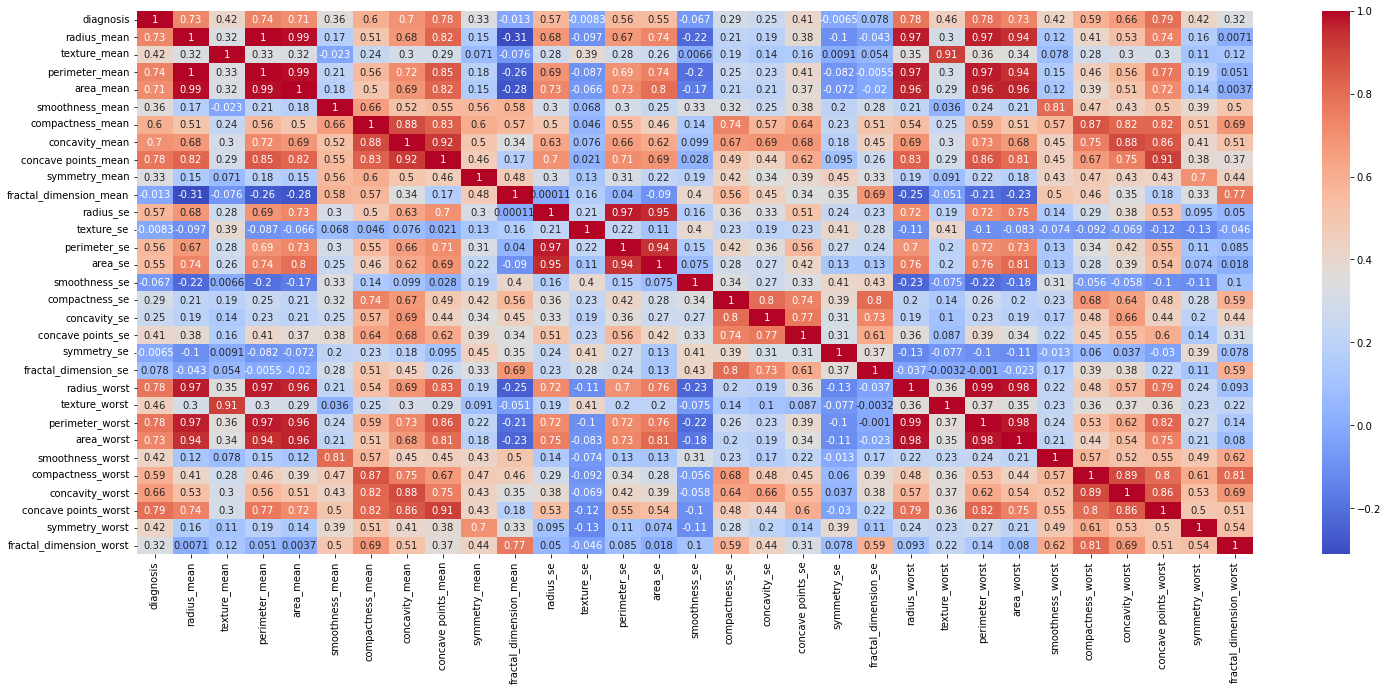

In [20]:
corr = breast_cancer.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr, annot = True, cmap="coolwarm")

In [21]:
breast_cancer.iloc[:,0:33].corr()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


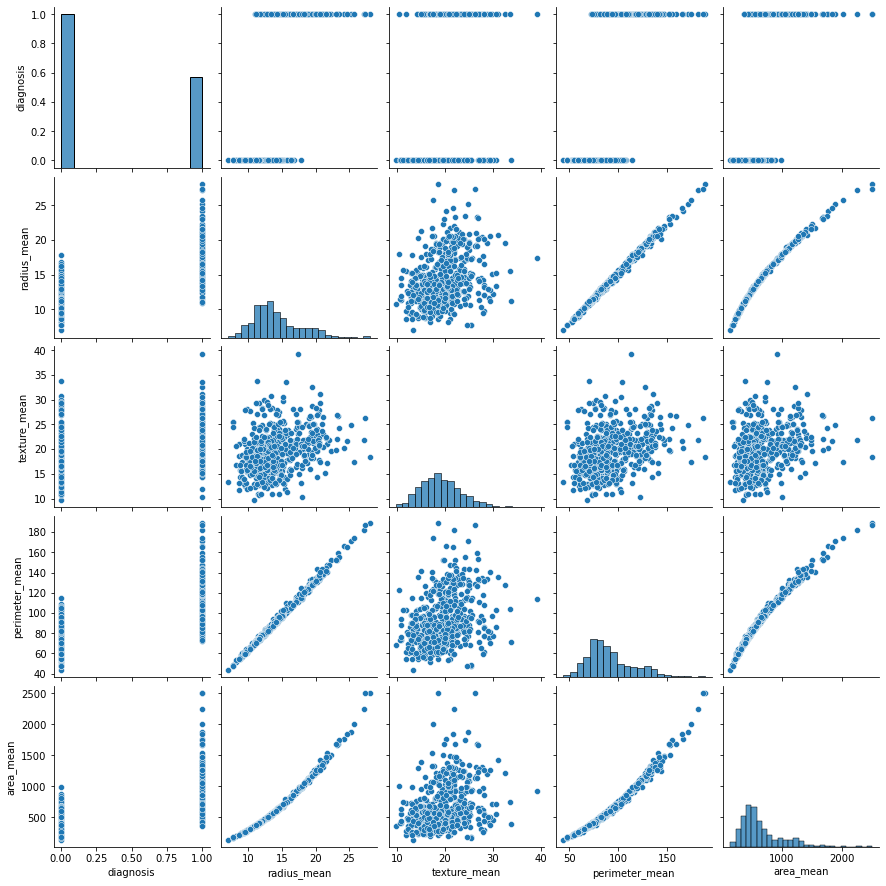

In [22]:
sns.pairplot(breast_cancer.iloc[:,0:5])

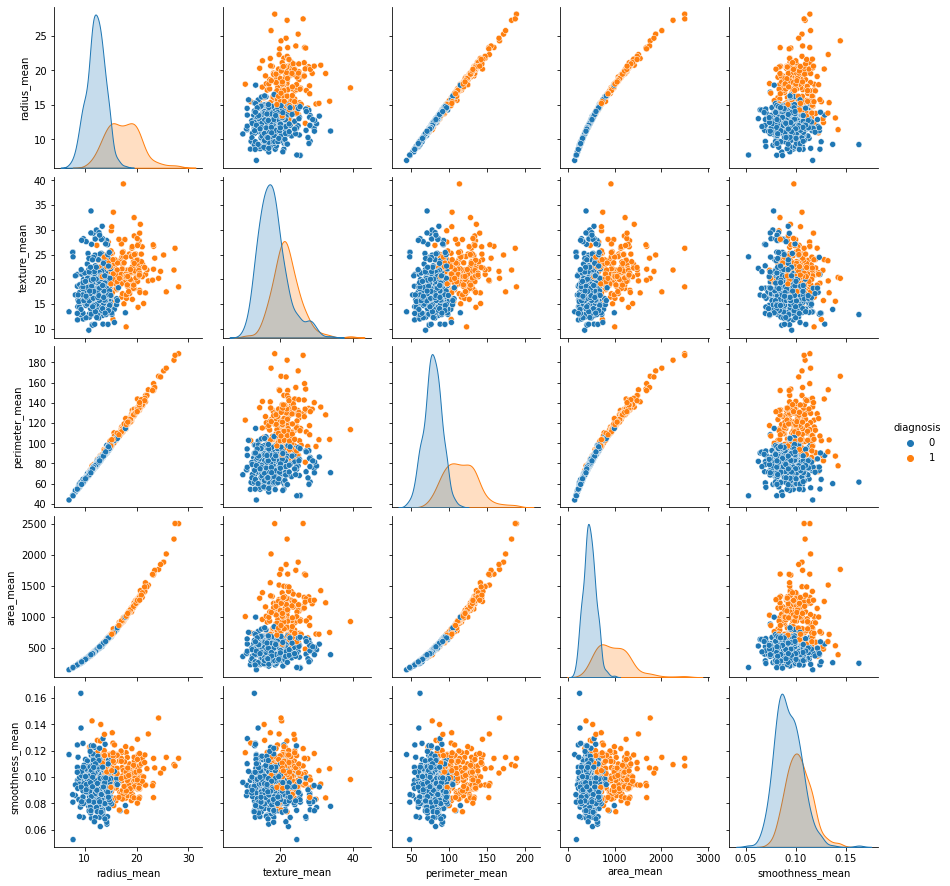

In [23]:
sns.pairplot(breast_cancer.iloc[:,0:6], hue='diagnosis')

## Standardize the data

In [24]:
print(breast_cancer.std())

diagnosis                    0.483918
radius_mean                  3.524049
texture_mean                 4.301036
perimeter_mean              24.298981
area_mean                  351.914129
smoothness_mean              0.014064
compactness_mean             0.052813
concavity_mean               0.079720
concave points_mean          0.038803
symmetry_mean                0.027414
fractal_dimension_mean       0.007060
radius_se                    0.277313
texture_se                   0.551648
perimeter_se                 2.021855
area_se                     45.491006
smoothness_se                0.003003
compactness_se               0.017908
concavity_se                 0.030186
concave points_se            0.006170
symmetry_se                  0.008266
fractal_dimension_se         0.002646
radius_worst                 4.833242
texture_worst                6.146258
perimeter_worst             33.602542
area_worst                 569.356993
smoothness_worst             0.022832
compactness_

In [25]:
scaler = StandardScaler()
scaler.fit(X)

StandardScaler()

In [26]:
standardized_data = scaler.transform(X)

In [27]:
standardized_data 

array([[ 1.09706398, -2.07333501,  1.26993369, ...,  2.29607613,
         2.75062224,  1.93701461],
       [ 1.82982061, -0.35363241,  1.68595471, ...,  1.0870843 ,
        -0.24388967,  0.28118999],
       [ 1.57988811,  0.45618695,  1.56650313, ...,  1.95500035,
         1.152255  ,  0.20139121],
       ...,
       [ 0.70228425,  2.0455738 ,  0.67267578, ...,  0.41406869,
        -1.10454895, -0.31840916],
       [ 1.83834103,  2.33645719,  1.98252415, ...,  2.28998549,
         1.91908301,  2.21963528],
       [-1.80840125,  1.22179204, -1.81438851, ..., -1.74506282,
        -0.04813821, -0.75120669]])

In [28]:
X = standardized_data
Y = breast_cancer['diagnosis']

## Train-Test Split

Splitting the data into Training Data and Testing Data

In [29]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [30]:
print(X.shape, X_train.shape, X_test.shape)

(569, 30) (455, 30) (114, 30)


In [31]:
print(X)
print(Y)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]
0      1
1      1
2      1
3      1
4      1
      ..
564    1
565    1
566    1
567    1
568    0
Name: diagnosis, Length: 569, dtype: int32


In [57]:
def models(X_train, Y_train):
    
    from sklearn.linear_model import LogisticRegression
    log = LogisticRegression()
    log.fit(X_train, Y_train)
    
    from sklearn.tree import DecisionTreeClassifier
    tree = DecisionTreeClassifier()
    tree.fit(X_train, Y_train)
    
    from sklearn.ensemble import RandomForestClassifier
    ran = RandomForestClassifier()
    ran.fit(X_train, Y_train)
    
    from sklearn.ensemble import ExtraTreesClassifier
    extra = ExtraTreesClassifier()
    extra.fit(X_train, Y_train)
    
    from sklearn.neighbors import KNeighborsClassifier
    neigh = KNeighborsClassifier()
    neigh.fit(X_train, Y_train)
    
    from sklearn.naive_bayes import GaussianNB
    nb = GaussianNB()
    nb.fit(X_train, Y_train)
    
    from sklearn.svm import SVC
    sv = SVC()
    sv.fit(X_train, Y_train)
    
    from sklearn.ensemble import AdaBoostClassifier
    ada =  AdaBoostClassifier()
    ada.fit(X_train, Y_train)
    
    from sklearn.ensemble import GradientBoostingClassifier
    grad = GradientBoostingClassifier()
    grad.fit(X_train, Y_train)
    
    
    from sklearn.linear_model import SGDClassifier  # For classification
    sgd = SGDClassifier(loss='log', max_iter=1000, tol=1e-3)
    sgd.fit(X_train, Y_train)


    # Create a voting classifier
    from sklearn.ensemble import VotingClassifier
    from sklearn.linear_model import LogisticRegression
    from sklearn.linear_model import SGDClassifier
    logistic_regression_classifier = LogisticRegression()
    sgd_classifier = SGDClassifier(loss='log', max_iter=1000, tol=1e-3)  # 'log' for logistic regression
    voting_classifier = VotingClassifier(estimators=[
    ('logistic_regression', logistic_regression_classifier),
    ('sgd', sgd_classifier)
    ], voting='hard')  # 'hard' for majority voting
    voting_classifier.fit(X_train, Y_train)
    
    print("[0]Logistic Regression Training Accuracy is", log.score(X_train, Y_train))
    print("[1]Decision Trees Training Accuracy is", tree.score(X_train, Y_train))
    print("[2]Random Forest Training Accuracy is", ran.score(X_train, Y_train))
    print("[3]Extra Trees Traaining Accuracy is", extra.score(X_train, Y_train))
    print("[4]KNearest Neighbors Training Accuracy is", neigh.score(X_train, Y_train))
    print("[5]Naive Bayes Training Accuracy is", nb.score(X_train, Y_train))
    print("[6]Support Vector Machines Training Accuracy is", sv.score(X_train, Y_train))
    print("[7]Adaboost Classifier Training Accuracy is", ada.score(X_train, Y_train))
    print("[8]Gradient Boosting Classifier Training Accuracy is", grad.score(X_train, Y_train))
    print("[9]SGD Classifier Training Accuracy is", sgd.score(X_train, Y_train))
    print("[9]Voting Class Classifier Training Accuracy is", voting_classifier.score(X_train, Y_train))
    
    return log, tree, ran, extra, neigh, nb, sv, ada, grad, sgd, voting_classifier

In [58]:
model = models(X_train, Y_train)

[0]Logistic Regression Training Accuracy is 0.989010989010989
[1]Decision Trees Training Accuracy is 1.0
[2]Random Forest Training Accuracy is 1.0
[3]Extra Trees Traaining Accuracy is 1.0
[4]KNearest Neighbors Training Accuracy is 0.9758241758241758
[5]Naive Bayes Training Accuracy is 0.9296703296703297
[6]Support Vector Machines Training Accuracy is 0.989010989010989
[7]Adaboost Classifier Training Accuracy is 1.0
[8]Gradient Boosting Classifier Training Accuracy is 1.0
[9]SGD Classifier Training Accuracy is 0.9802197802197802
[9]Voting Class Classifier Training Accuracy is 0.9868131868131869


In [59]:
from sklearn.metrics import confusion_matrix

for i in range( len(model) ):
  print('Model ', i)
  cm = confusion_matrix(Y_test, model[i].predict(X_test))

  TP = cm[0][0]
  TN = cm[1][1]
  FN = cm[1][0]
  FP = cm[0][1]

    
  print(cm)
  print('Testing Accuracy = ', (TP + TN)/ (TP + TN + FN + FP))
  print()

Model  0
[[67  2]
 [ 1 44]]
Testing Accuracy =  0.9736842105263158

Model  1
[[61  8]
 [ 2 43]]
Testing Accuracy =  0.9122807017543859

Model  2
[[65  4]
 [ 3 42]]
Testing Accuracy =  0.9385964912280702

Model  3
[[66  3]
 [ 3 42]]
Testing Accuracy =  0.9473684210526315

Model  4
[[69  0]
 [ 3 42]]
Testing Accuracy =  0.9736842105263158

Model  5
[[65  4]
 [ 3 42]]
Testing Accuracy =  0.9385964912280702

Model  6
[[66  3]
 [ 1 44]]
Testing Accuracy =  0.9649122807017544

Model  7
[[65  4]
 [ 2 43]]
Testing Accuracy =  0.9473684210526315

Model  8
[[65  4]
 [ 4 41]]
Testing Accuracy =  0.9298245614035088

Model  9
[[65  4]
 [ 1 44]]
Testing Accuracy =  0.956140350877193

Model  10
[[68  1]
 [ 1 44]]
Testing Accuracy =  0.9824561403508771



In [46]:
pred = model[4].predict(X_test)
print(pred)

print()





[0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 0 1 1 0 0
 0 0 0 1 1 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 1 0 1
 0 1 0 0 0 1 1 1 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1 0 0 0 0 0 0 1
 1 0 1]



In [60]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

for i in range( len(model) ):
  print('Model ', i)
  print( classification_report(Y_test, model[i].predict(X_test)))
  print( accuracy_score(Y_test, model[i].predict(X_test)))
  print()

Model  0
              precision    recall  f1-score   support

           0       0.99      0.97      0.98        69
           1       0.96      0.98      0.97        45

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114

0.9736842105263158

Model  1
              precision    recall  f1-score   support

           0       0.97      0.88      0.92        69
           1       0.84      0.96      0.90        45

    accuracy                           0.91       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.91      0.91       114

0.9122807017543859

Model  2
              precision    recall  f1-score   support

           0       0.96      0.94      0.95        69
           1       0.91      0.93      0.92        45

    accuracy                           0.94       114
   macro avg       0.93      0.94      0.94       114
weighte

In [64]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDClassifier
sgd_classifier = SGDClassifier(loss='log', max_iter=1000, tol=1e-3) 
voting_classifier = VotingClassifier(estimators=[
                    ('logistic_regression', logistic_regression_classifier),
                    ('sgd', sgd_classifier)
                    ], voting='hard')
voting_classifier.fit(X_train, Y_train)
    

VotingClassifier(estimators=[('logistic_regression', LogisticRegression()),
                             ('sgd', SGDClassifier(loss='log'))])

In [ ]:
filename = 'refined_model.sav'
pickle.dump(log, open(filename, 'wb'))

## Saving the Model

In [67]:
import pickle

In [68]:
filename = 'refined_model.sav'
pickle.dump(log, open(filename, 'wb'))

## Loading the Saved Model

In [73]:
loaded_model = pickle.load(open('refined_model.sav', 'rb'))
input_data = (9.876,19.4,63.95,298.3,0.1005,0.09697,0.06154,0.03029,0.1945,0.06322,0.1803,1.222,1.528,11.77,0.009058,0.02196,0.03029,0.01112,0.01609,0.00357,10.76,26.83,72.22,361.2,0.1559,0.2302,0.2644,0.09749,0.2622,0.0849)
# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data

prediction = log.predict(input_data_reshaped)
print(prediction)

if (prediction[0] == 0):
    print('The Breast Cancer is BENIGN')
else:
    print ('The Breast Cancer is MALIGNANT')

[1]
The Breast Cancer is MALIGNANT


## Building a Predictive System

In [72]:
input_data = (9.876,19.4,63.95,298.3,0.1005,0.09697,0.06154,0.03029,0.1945,0.06322,0.1803,1.222,1.528,11.77,0.009058,0.02196,0.03029,0.01112,0.01609,0.00357,10.76,26.83,72.22,361.2,0.1559,0.2302,0.2644,0.09749,0.2622,0.0849)

# changing the input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = log.predict(std_data)
print(prediction)

if (prediction[0] == 0):
    print('The Breast Cancer is BENIGN')
else:
    print ('The Breast Cancer is MALIGNANT')

[[-1.20742721  0.02567953 -1.1541096  -1.014176    0.29460492 -0.13969105
  -0.34223992 -0.48051986  0.48696784  0.0598782  -0.81161048  0.00933765
  -0.66238028 -0.62852458  0.67236762 -0.19662716 -0.05317446 -0.10967597
  -0.53907767 -0.08507019 -1.14085696  0.18772255 -1.0437319  -0.9130302
   1.03152016 -0.1530873  -0.03736543 -0.26062184 -0.45096559  0.05287682]]
[0]
The Breast Cancer is BENIGN
